In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

In [37]:
# Overview of the DataFrame
print(df_filtered.info())  # Column names, non-null counts, data types
print("\nShape:", df_filtered.shape)  # Number of rows and columns
print("\nFirst Few Rows:\n", df_filtered.head())  # First 5 rows
print("\nLast Few Rows:\n", df_filtered.tail())  # Last 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 312 to 18236
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2704 non-null   int64  
 1   Date          2704 non-null   object 
 2   AveragePrice  2704 non-null   float64
 3   Total Volume  2704 non-null   float64
 4   4046          2704 non-null   float64
 5   4225          2704 non-null   float64
 6   4770          2704 non-null   float64
 7   Total Bags    2704 non-null   float64
 8   Small Bags    2704 non-null   float64
 9   Large Bags    2704 non-null   float64
 10  XLarge Bags   2704 non-null   float64
 11  type          2704 non-null   object 
 12  year          2704 non-null   int64  
 13  region        2704 non-null   object 
 14  region_type   2704 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 338.0+ KB
None

Shape: (2704, 15)

First Few Rows:
      Unnamed: 0        Date  AveragePrice  Total Volume   

   quarter-year  AveragePrice  Total Volume
0       2015-Q1      1.303269  4.167143e+08
1       2015-Q2      1.344087  4.576087e+08
2       2015-Q3      1.408798  4.175385e+08
3       2015-Q4      1.313654  3.653937e+08
4       2016-Q1      1.200481  4.883719e+08
5       2016-Q2      1.193317  5.187357e+08
6       2016-Q3      1.375962  4.533826e+08
7       2016-Q4      1.443077  3.586689e+08
8       2017-Q1      1.231731  5.153125e+08
9       2017-Q2      1.444087  5.010321e+08
10      2017-Q3      1.665192  4.157885e+08
11      2017-Q4      1.528661  4.325604e+08
12      2018-Q1      1.323281  5.236323e+08


<bound method Axes.set of <Axes: >>

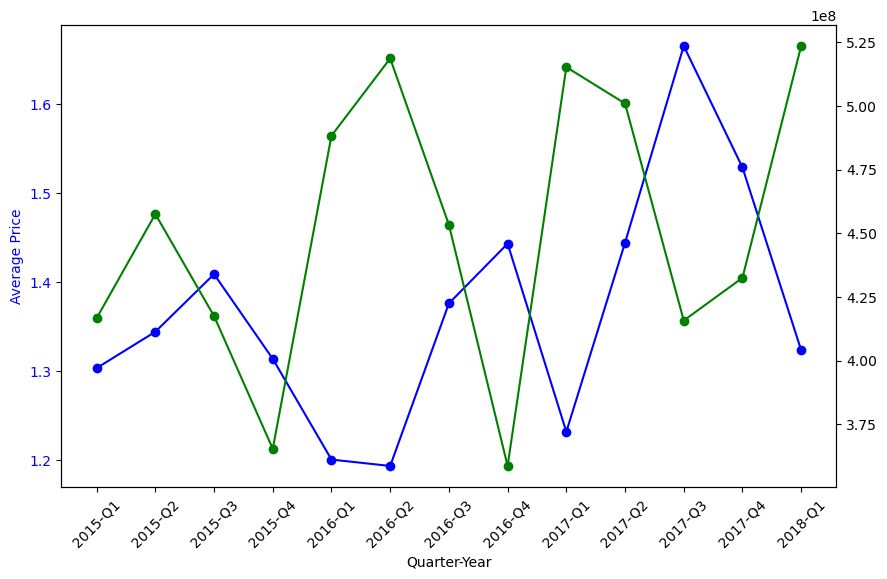

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Group by Quarter and calculate the average price and total volume
quarterly_cohort = df_filtered.groupby(pd.Grouper(key='Date', freq='QS')).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Add a 'quarter-year' column to show year-quarter in "YYYY-QX" format
quarterly_cohort['quarter-year'] = quarterly_cohort['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Display the cohort with quarter-year, average price, and total volume
print(quarterly_cohort[['quarter-year', 'AveragePrice', 'Total Volume']])

# Visualize the results in a line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the evolution of average price on the first y-axis using quarter-year on the x-axis
ax1.plot(quarterly_cohort['quarter-year'], quarterly_cohort['AveragePrice'], label='Average Price', color='blue', marker='o')
ax1.set_xlabel('Quarter-Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=45)

# Create a second y-axis for total volume
ax2 = ax1.twinx()
ax2.plot(quarterly_cohort['quarter-year'], quarterly_cohort['Total Volume'], label='Total Volume', color='green', marker='o')
ax2.set



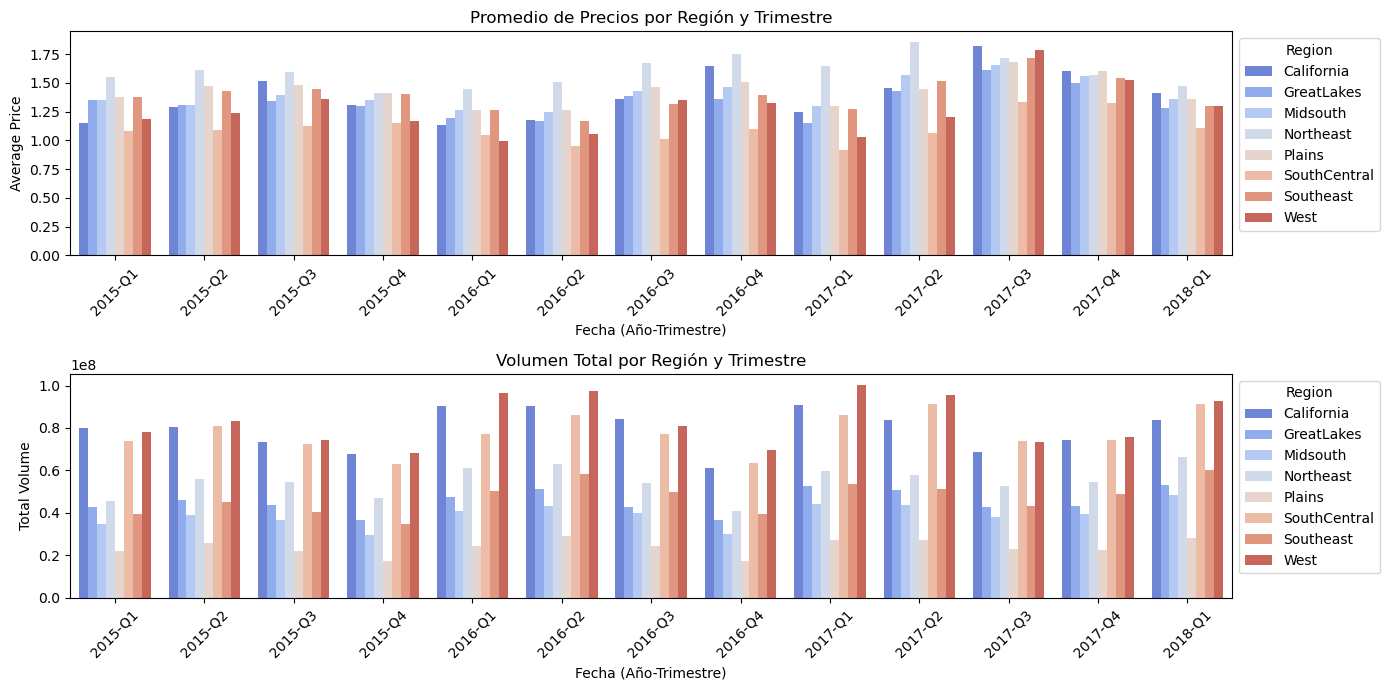

In [46]:
# Agrupar los datos por 'region' y 'Date', calculando el promedio de AveragePrice y la suma de Total Volume
cohort_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_region['quarter-year'] = cohort_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de barras para Average Price por región
plt.subplot(2, 1, 1)
sns.barplot(data=cohort_region, x='quarter-year', y='AveragePrice', hue='region', palette='coolwarm')
plt.title('Promedio de Precios por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Gráfico de barras para Total Volume por región
plt.subplot(2, 1, 2)
sns.barplot(data=cohort_region, x='quarter-year', y='Total Volume', hue='region', palette='coolwarm')
plt.title('Volumen Total por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Mostrar los gráficos
plt.show()



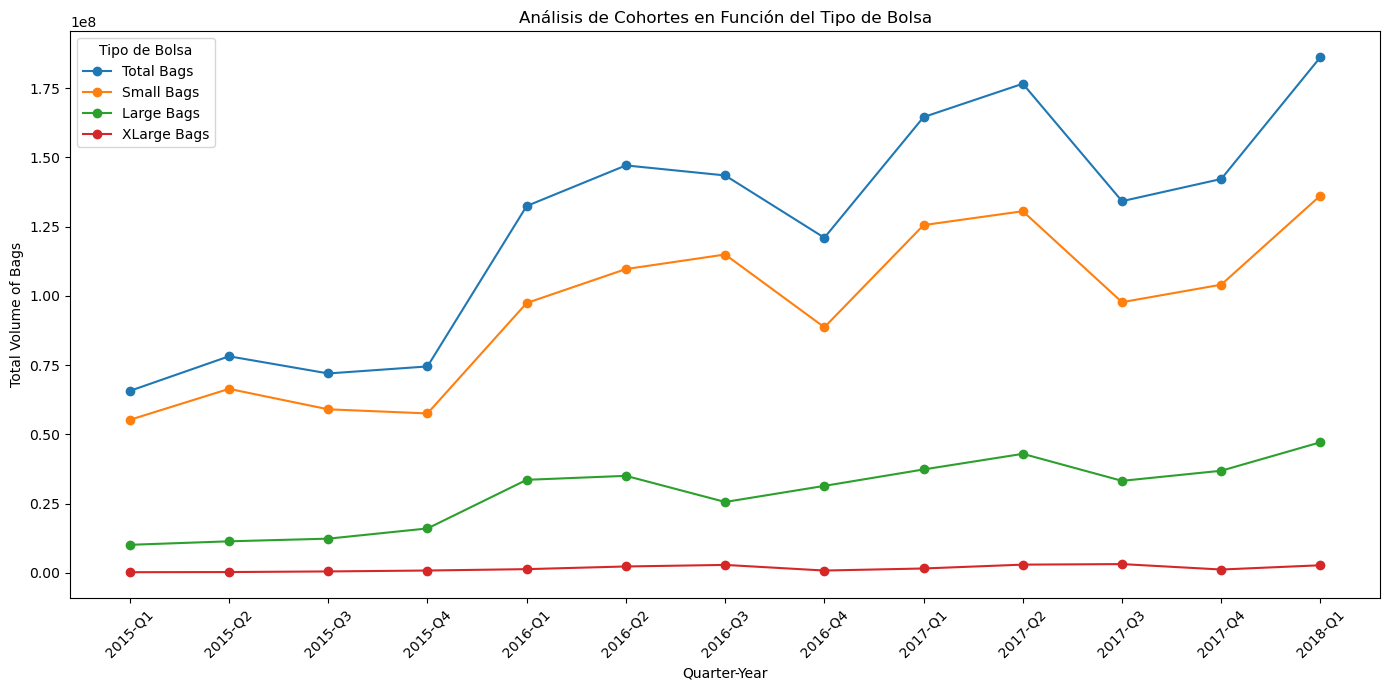

In [40]:
# Agrupar los datos por 'Date' y calcular la suma de Total Bags, Small Bags, Large Bags, y XLarge Bags
cohort_bags = df_filtered.groupby(pd.Grouper(key='Date', freq='QE')).agg({
    'Total Bags': 'sum',
    'Small Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_bags['quarter-year'] = cohort_bags['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Graficar Total Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Total Bags'], label='Total Bags', marker='o')
# Graficar Small Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Small Bags'], label='Small Bags', marker='o')
# Graficar Large Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Large Bags'], label='Large Bags', marker='o')
# Graficar XLarge Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['XLarge Bags'], label='XLarge Bags', marker='o')

# Añadir título y etiquetas
plt.title('Análisis de Cohortes en Función del Tipo de Bolsa')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume of Bags')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Tipo de Bolsa')
plt.tight_layout()  # Ajustar el diseño
plt.show()


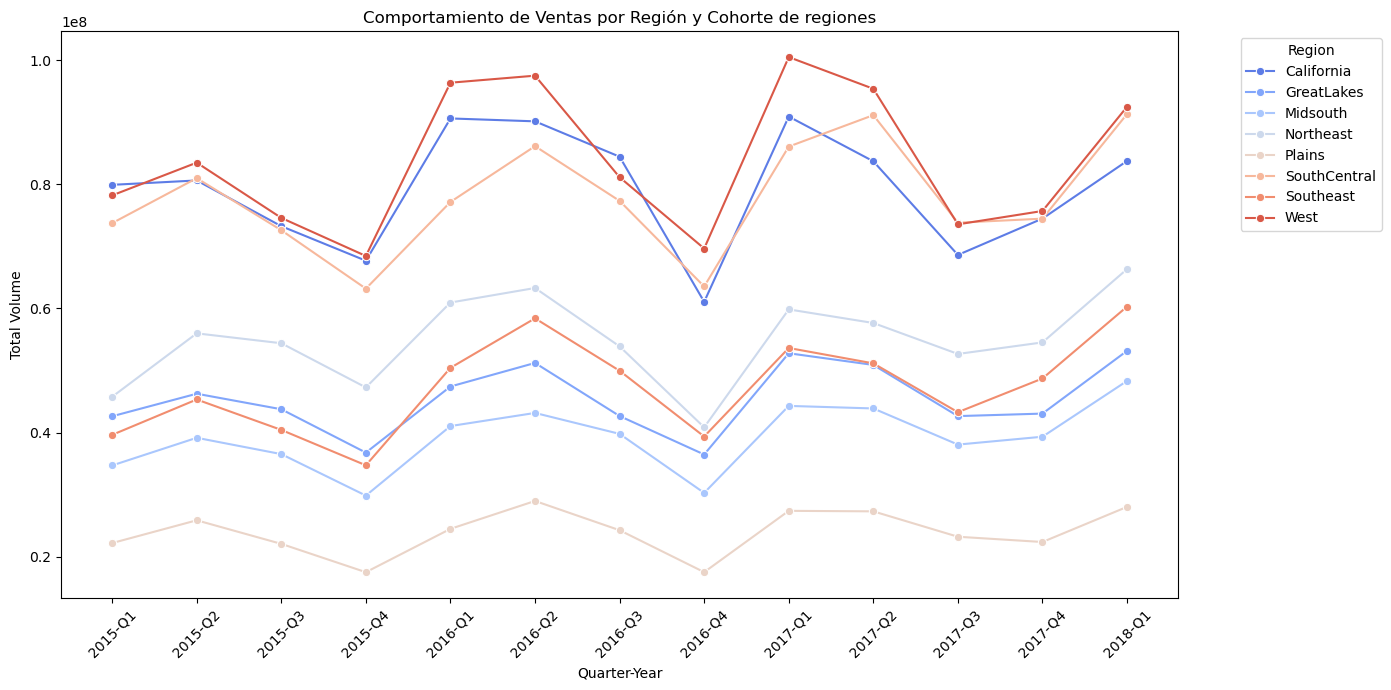

In [41]:
# Agrupar los datos por 'region' y 'Date', calculando el volumen total de ventas
cohort_sales_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_sales_region['quarter-year'] = cohort_sales_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de líneas para el volumen total de ventas por región
sns.lineplot(data=cohort_sales_region, x='quarter-year', y='Total Volume', hue='region', marker='o', palette='coolwarm')

# Configuración del gráfico
plt.title('Comportamiento de Ventas por Región y Cohorte de regiones')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()



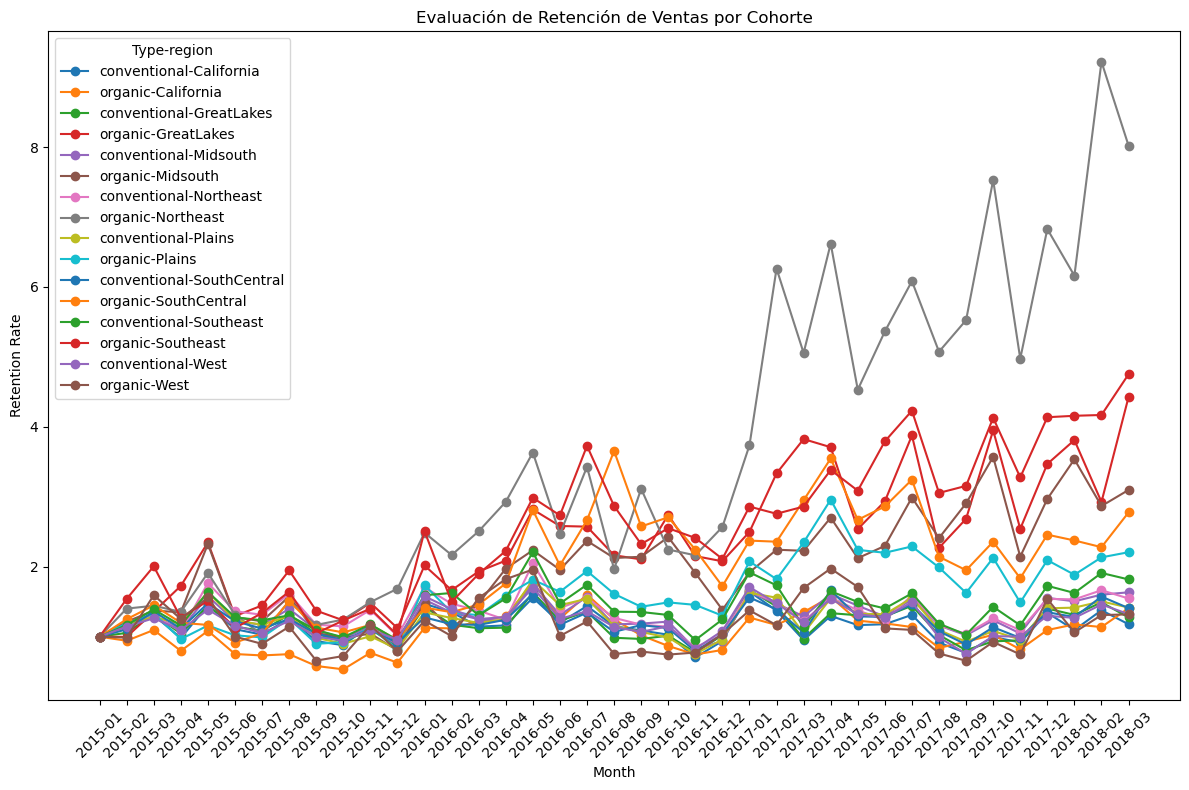

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Add a 'Year-Month' column to group by month
df_filtered['Year-Month'] = df_filtered['Date'].dt.to_period('M')

# Group by Region, Type, and Year-Month to calculate the total volume each month
monthly_cohorts = df_filtered.groupby(['region', 'type', 'Year-Month']).agg({
    'Total Volume': 'sum'
}).reset_index()

# Calculate retention: we will track how much of the initial month's volume is retained in subsequent months
retention = []

# Loop through each unique (Region, Type) cohort
for (region, cohort_type), group in monthly_cohorts.groupby(['type', 'region']):
    
    # Sort by Year-Month
    group = group.sort_values(by='Year-Month')
    
    # Initial month's volume
    initial_volume = group.iloc[0]['Total Volume']
    
    # Calculate retention for each month: volume in the current month / initial month's volume
    group['Retention'] = group['Total Volume'] / initial_volume
    
    # Append the cohort's retention data for plotting
    retention.append(group[['type', 'region', 'Year-Month', 'Retention']])

# Combine all cohort retention data
retention_df = pd.concat(retention)

# Visualize the retention for each Region-Type cohort
fig, ax = plt.subplots(figsize=(12, 8))

# Plot retention for each (Region, Type) cohort
for (region, cohort_type), group in retention_df.groupby(['region', 'type']):
    ax.plot(group['Year-Month'].astype(str), group['Retention'], label=f'{cohort_type}-{region}', marker='o')

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Retention Rate')
ax.set_title('Evaluación de Retención de Ventas por Cohorte')
plt.xticks(rotation=45)
ax.legend(title='Type-region')
plt.tight_layout()

# Show the plot
plt.show()



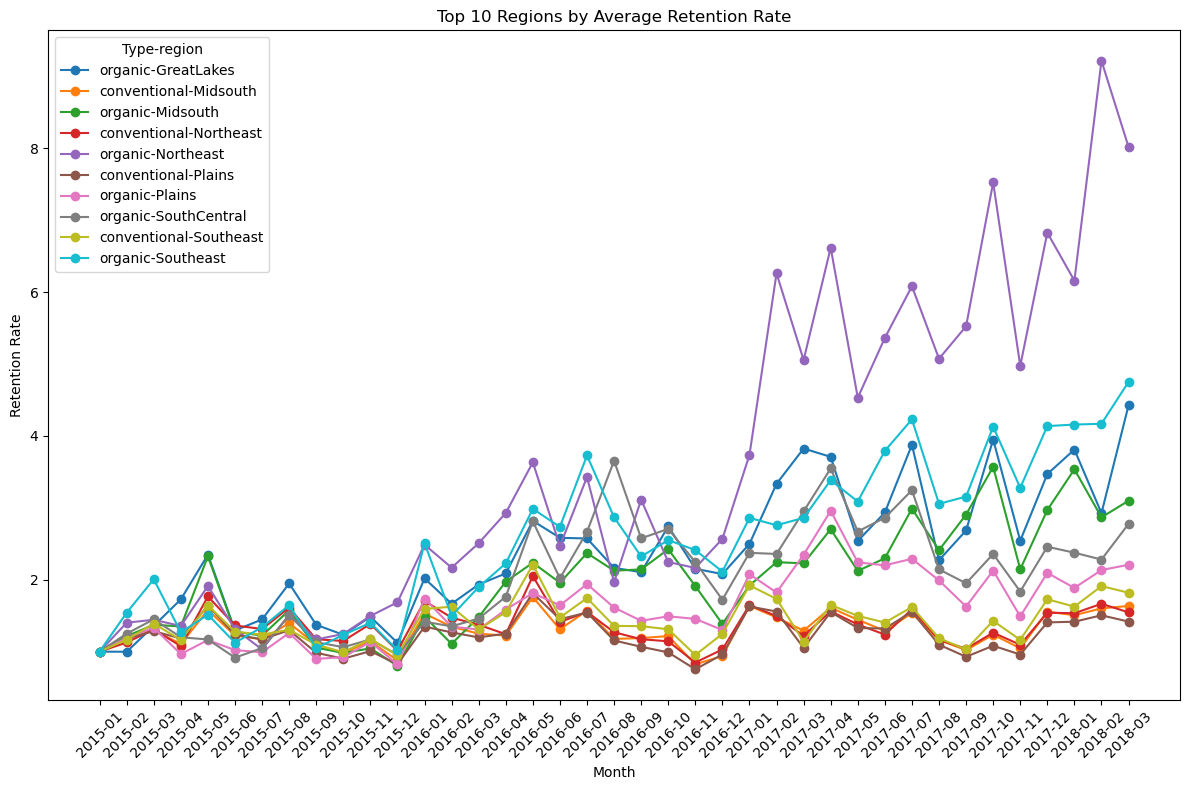

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is in datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Add a 'Year-Month' column to group by month
df_filtered['Year-Month'] = df_filtered['Date'].dt.to_period('M')

# Group by Region, Type, and Year-Month to calculate the total volume each month
monthly_cohorts = df_filtered.groupby(['region', 'type', 'Year-Month']).agg({
    'Total Volume': 'sum'
}).reset_index()

# Calculate retention: track how much of the initial month's volume is retained in subsequent months
retention = []

# Loop through each unique (Region, Type) cohort
for (region, cohort_type), group in monthly_cohorts.groupby(['type', 'region']):
    # Sort by Year-Month
    group = group.sort_values(by='Year-Month')
    
    # Initial month's volume
    initial_volume = group.iloc[0]['Total Volume']
    
    # Calculate retention for each month
    group['Retention'] = group['Total Volume'] / initial_volume
    
    # Append the cohort's retention data for plotting
    retention.append(group[['type', 'region', 'Year-Month', 'Retention']])

# Combine all cohort retention data
retention_df = pd.concat(retention)

# Calculate the average retention rate over time for each (Region, Type) cohort
average_retention = retention_df.groupby(['region', 'type'])['Retention'].mean().reset_index()

# Sort by retention rate and select the top 10 regions
top_10_regions = average_retention.nlargest(10, 'Retention')[['region', 'type']]

# Filter the retention DataFrame to include only the top 10 regions
top_retention_df = retention_df.merge(top_10_regions, on=['region', 'type'], how='inner')

# Visualize the retention for the top 10 (Region, Type) cohorts
fig, ax = plt.subplots(figsize=(12, 8))

# Plot retention for each of the top 10 cohorts
for (region, cohort_type), group in top_retention_df.groupby(['region', 'type']):
    ax.plot(group['Year-Month'].astype(str), group['Retention'], label=f'{cohort_type}-{region}', marker='o')

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Retention Rate')
ax.set_title('Top 10 Regions by Average Retention Rate')
plt.xticks(rotation=45)
ax.legend(title='Type-region')
plt.tight_layout()

# Show the plot
plt.show()
